# 1.1 - Exemplo: Regressão Polinômial

O objetivo é ajustar uma curva polinomial aos nossos dados. 
Segue a forma de tal função:

$
y(x, \mathbf{w}) = w_0 + w_1 x + w_2 x^2 + \cdots + w_M x^M
$

<a id="funcao-1.1"></a>
Reformulando usando notação de somatório temos:

$
y(x, \mathbf{w}) = \sum_{j=0}^{M} w_j x^j
$ 
  (1.1)


Os coeficientes $\mathbf{w}$ da função polinomial em [1.1](#funcao-1.1) serão determinados através de um processo que ajusta o polinômio a um conjunto de dados de treino. O critério de qualidade do ajuste é uma *função de erro* que mede o quão bem o polinômio se ajusta aos dados. O objetivo é minimizar o erro residual usando a seguinte função:
<a id="funcao-1.2"></a>
$$
E(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^{N} (y(x_n, \mathbf{w}) - t_n)^2
$$ (1.2)

Onde:
- $y(x_n, \mathbf{w})$ é a predição do modelo para o ponto $x_n$.
- $t_n$ é o valor observado correspondente ao ponto $x_n$.
- $N$ é o número total de pontos de dados.

Dividir o somatório por 2 é uma convenção comum que simplifica a derivada da função de erro, especialmente no contexto de métodos de otimização como o [gradiente descendente](https://pt.wikipedia.org/wiki/M%C3%A9todo_do_gradiente).

No livro, é utilizado um conjunto de dados gerados artificialmente pela função $\sin(2\pi x)$. A cada ponto da função é adicionado um ruído aleatório proveniente de uma distribuição gaussiana, e esses pontos serão nossos valores observados $t_n$. O objetivo é simular observações reais que são corrompidas por ruídos aleatórios, os quais surgem naturalmente de fontes desconhecidas, seja devido à imprecisão das medições ou a outros fatores não identificados.

A seguir, temos uma reprodução da Figura 1.2 do livro:
<a id="figura-1.2"></a>

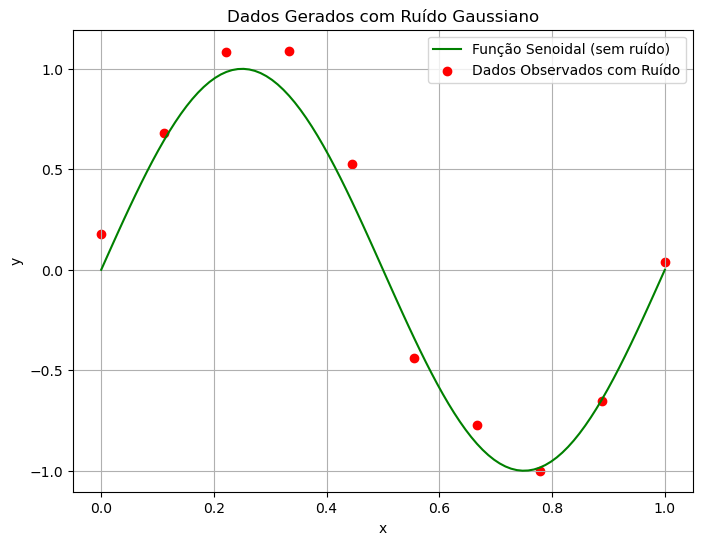

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Configurações
np.random.seed(0)  # Para reprodutibilidade
num_pontos = 10
x = np.linspace(0, 1, num_pontos)  # 10 pontos no intervalo [0, 1]
x_suave = np.linspace(0, 1, 100)  # Para a curva suave
ruido_std = 0.1  # Desvio padrão do ruído gaussiano

# Gera os valores da função seno
y_true = np.sin(2 * np.pi * x)
y_true_suave = np.sin(2 * np.pi * x_suave)

# Adiciona ruído gaussiano
ruido = np.random.normal(0, ruido_std, num_pontos)
y_observado = y_true + ruido

# Plota os resultados
plt.figure(figsize=(8, 6))
plt.plot(x_suave, y_true_suave, label='Função Senoidal (sem ruído)', color='green')
plt.scatter(x, y_observado, color='red', label='Dados Observados com Ruído')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dados Gerados com Ruído Gaussiano')
plt.legend()
plt.grid(True)
plt.show()